In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import signal
import pycmap 

In [3]:
# set up API 
api = pycmap.API(token='68fbf4b0-22f4-11ec-a2c9-a3d02432460d')

In [4]:
ifcb_table_name = "tblMGL1704_Gradients2_IFCB_Abundance"

In [4]:
api.get_dataset_metadata(ifcb_table_name)

,Variable,Table_Name,Long_Name,Unit,Make,Sensor,Process_Level,Study_Domain,Temporal_Resolution,Spatial_Resolution,...,Dataset_Short_Name,Data_Source,Distributor,Dataset_Description,Acknowledgement,Dataset_ID,ID,Visualize,Keywords,Refrences
0,Sample,tblMGL1704_Gradients2_IFCB_Abundance,samples filename from IFCB,NaN,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5712,NaN,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawaii.edu/IFCB_NPTZ, [..."
1,Acanthoica,tblMGL1704_Gradients2_IFCB_Abundance,Abundance of cells in genus Acanthoica,cells L-1,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5713,1.0,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawaii.edu/IFCB_NPTZ, [..."
2,Acanthometron,tblMGL1704_Gradients2_IFCB_Abundance,Abundance of cells in genus Acanthometron,cells L-1,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5714,1.0,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawaii.edu/IFCB_NPTZ, [..."
3,Acanthostaurus,tblMGL1704_Gradients2_IFCB_Abundance,Abundance of cells in genus Acanthostaurus,cells L-1,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5715,1.0,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawaii.edu/IFCB_NPTZ, [..."
4,Achnanthes,tblMGL1704_Gradients2_IFCB_Abundance,Abundance of cells in genus Achnanthes,cells L-1,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5716,1.0,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawaii.edu/IFCB_NPTZ, [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Uronema,tblMGL1704_Gradients2_IFCB_Abundance,Abundance of cells in genus Uronema,cells L-1,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5879,1.0,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawaii.edu/IFCB_NPTZ, [..."
168,Warnowia,tblMGL1704_Gradients2_IFCB_Abundance,Abundance of cells in genus Warnowia,cells L-1,Observation,Flow Cytobot,Reprocessed,Biology+Biogeography,Irregular,Irregular,...,Gradients2_MGL1704_IFCB_Abundance,"Angel White Lab, University of Hawaii at Manoa","Angel White Lab, University of Hawaii at Manoa",The Imaging FlowCytoBot (IFCB) is an in situ a...,These Simons Collaboration on Ocean Processes ...,375,5880,1.0,"abundance, angel white lab, cell abundance, ce...","http://ifcb-data.soest.hawa

In [5]:
# get the whole dataset 
DF_IFCB = api.get_dataset(ifcb_table_name)
DF_IFCB.head()

,time,lat,lon,depth,Sample,Acanthoica,Acanthometron,Acanthostaurus,Achnanthes,Actinoptychus,...,Trichodesmium,Tropidoneis,Umbellosphaera,Umbilicosphaera,Undella,Uronema,Warnowia,Total_Cells,Temperature,Salinity
0,2017-05-30T22:39:00,29.70660,-158.0012,5,D20170530T223928_IFCB000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,403.694532,NaN,NaN,NaN,NaN,3835.098050,22.60010,33.23830
1,2017-05-30T23:03:00,29.77720,-158.0001,5,D20170530T230246_IFCB000,NaN,202.716747,NaN,NaN,NaN,...,NaN,NaN,608.150241,NaN,NaN,NaN,NaN,7905.953140,22.65945,33.37695
2,2017-05-30T23:26:00,29.84345,-158.0004,5,D20170530T232604_IFCB000,405.147569,NaN,NaN,NaN,NaN,...,NaN,NaN,607.721354,NaN,NaN,NaN,NaN,8508.098956,22.58700,33.29670
3,2017-05-30T23:49:00,29.91305,-157.9991,5,D20170530T234922_IFCB000,610.447502,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12412.432540,22.54985,33.34585
4,2017-05-31T00:13:00,29.98565,-157.9989,5,D20170531T001240_IFCB000,202.177498,NaN,NaN,NaN,NaN,...,NaN,NaN,606.532493,NaN,NaN,NaN,NaN,7076.212418,22.48495,33.08935


In [17]:
# get size class dataset
size_table_name = "tblMGL1704_Gradients2_IFCB_ESD"
size_df = api.get_dataset(size_table_name)

In [18]:
# sort genus names by size, returns a list of ALL genuses as strings
def get_genus_list_sorted_by_size_class():
    df_size_ordered = size_df.drop(['lat', 'lon', 'depth', 'time', 'Sample'], axis=1).mean().sort_values()
    return list(df_size_ordered.index)

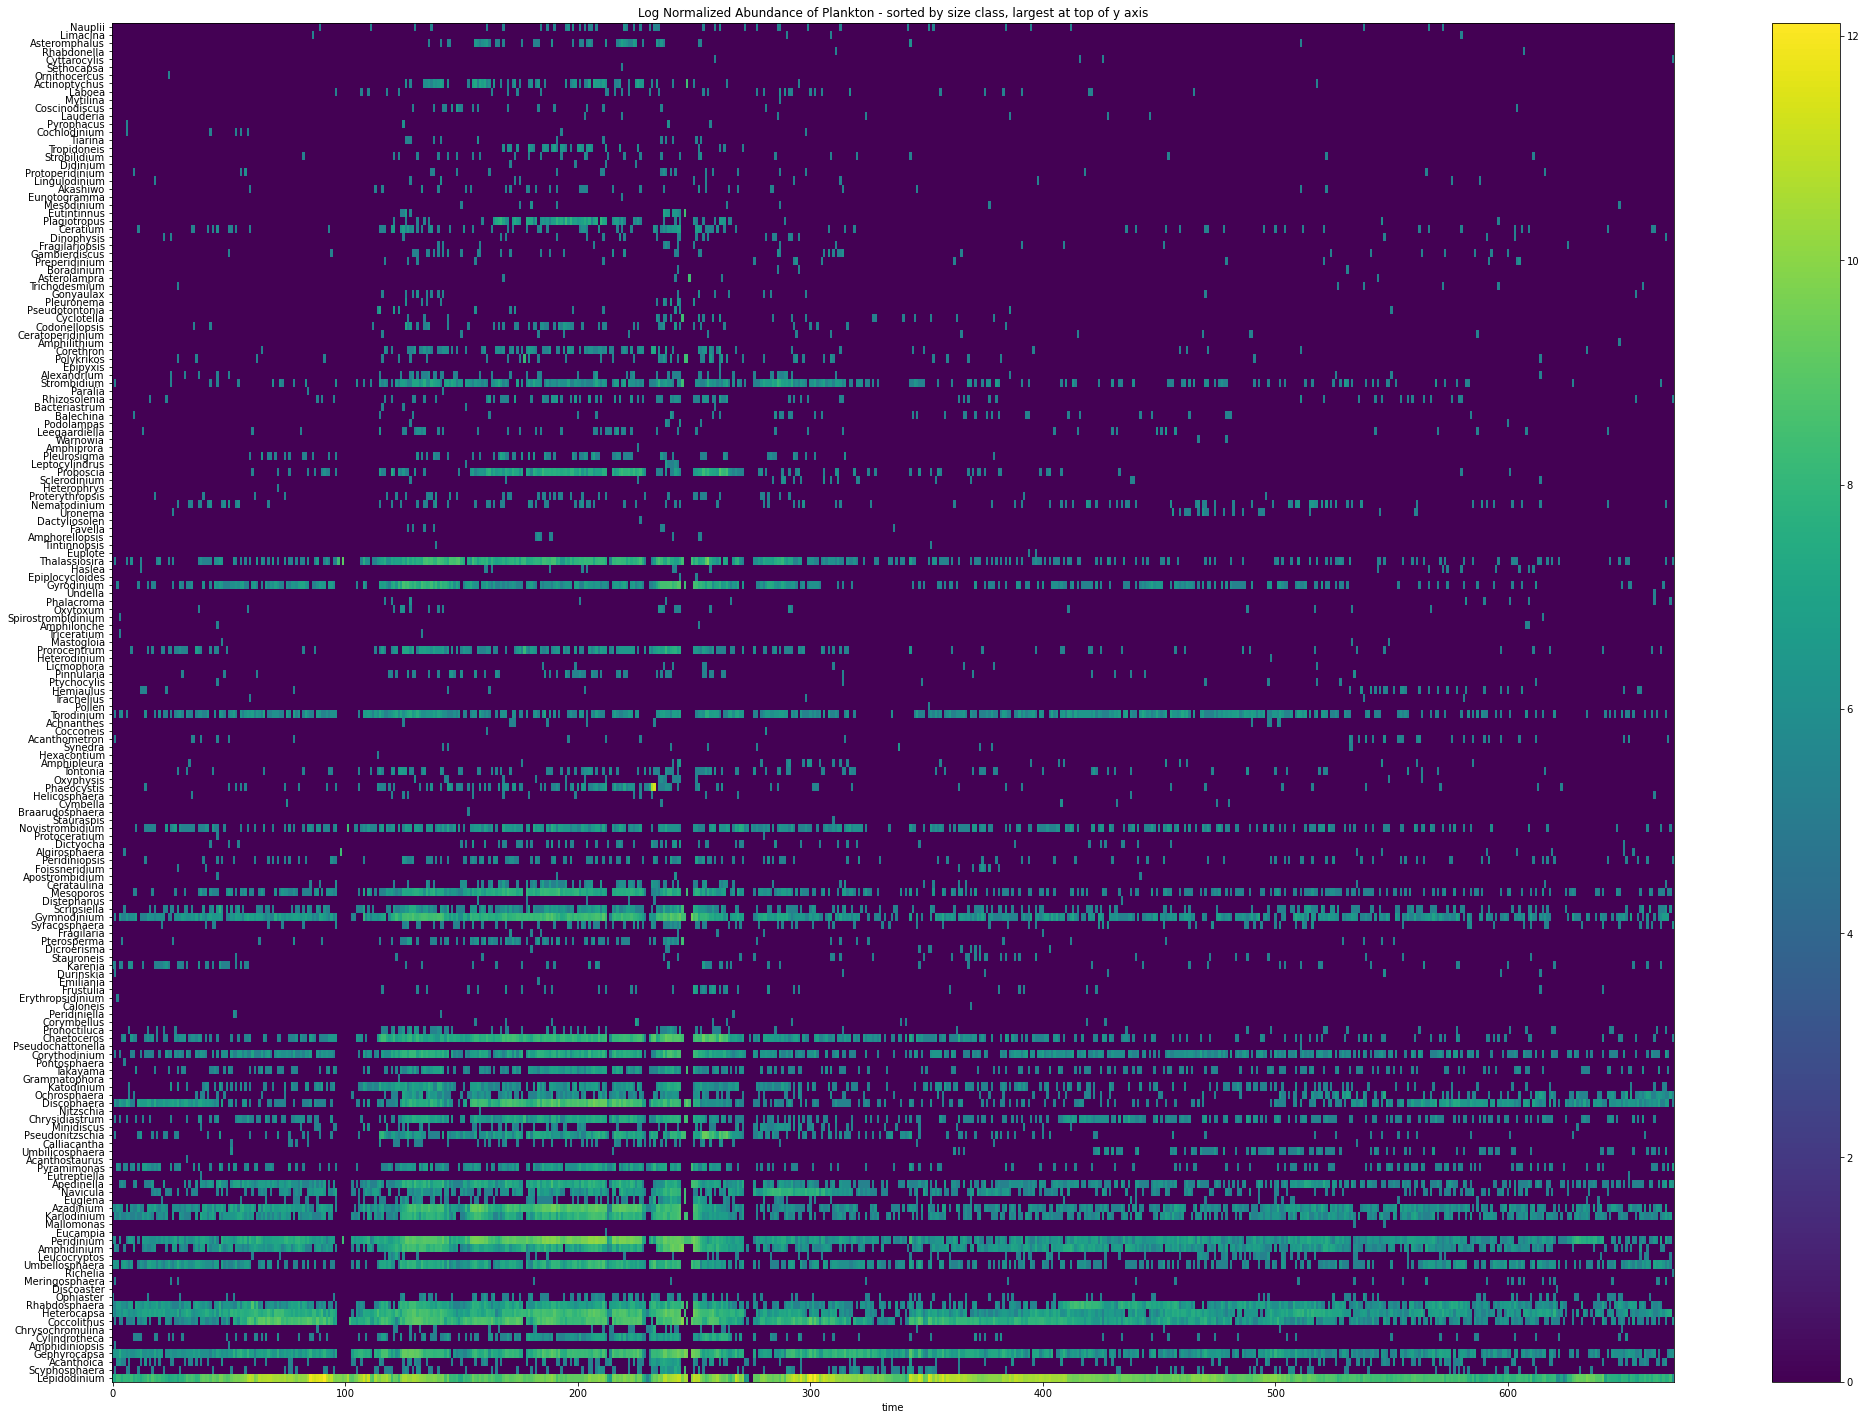

In [107]:
# PLOT - genus sorted by avg size, log normalized

# clean data
df_ifcb = DF_IFCB
df_ifcb = df_ifcb[:].apply(pd.to_numeric, errors='coerce') 
df_ifcb = df_ifcb.fillna(0)

# order p_cols by abundance 
# p_sum = df_ifcb.drop(['lat', 'lon', 'depth', 'Temperature', 'Salinity', 'Sample', 'Total_Cells'], axis=1).sum()
# p_sum = pd.to_numeric(p_sum)
# top_10 = p_sum.nlargest(10).index
# p_cols = top_10

# order p_cols by size class 
p_cols = get_genus_list_sorted_by_size_class()

fig, ax = plt.subplots()
# build heatmap
hm_df = pd.DataFrame(columns=df_ifcb['time'], index=p_cols)
for i in range(len(p_cols)):
    p = p_cols[i]
    hm_df.loc[p]= list(df_ifcb[p])

# convert hm_df vals to floats
hm_df = hm_df[:].apply(pd.to_numeric, errors='coerce') 
hm_df = hm_df.fillna(0)

# log val
hm_df[:] = hm_df[:] + 1 
hm_df = hm_df[:].apply(np.log)

hm_df.describe()
pcm = ax.pcolormesh(df_ifcb.index, p_cols, hm_df, cmap='viridis', shading='auto')
plt.colorbar(pcm)
plt.xlabel("time")
plt.title("Log Normalized Abundance of Plankton - sorted by size class, largest at top of y axis")
fig.set_size_inches(35, 25)
#plt.savefig("p_genus_abundance")
#plt.show()



/var/folders/3d/888v68391rv_kgq9_5s8b2x80000gn/T/ipykernel_9378/3587285609.py:4: RuntimeWarning: invalid value encountered in true_divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))


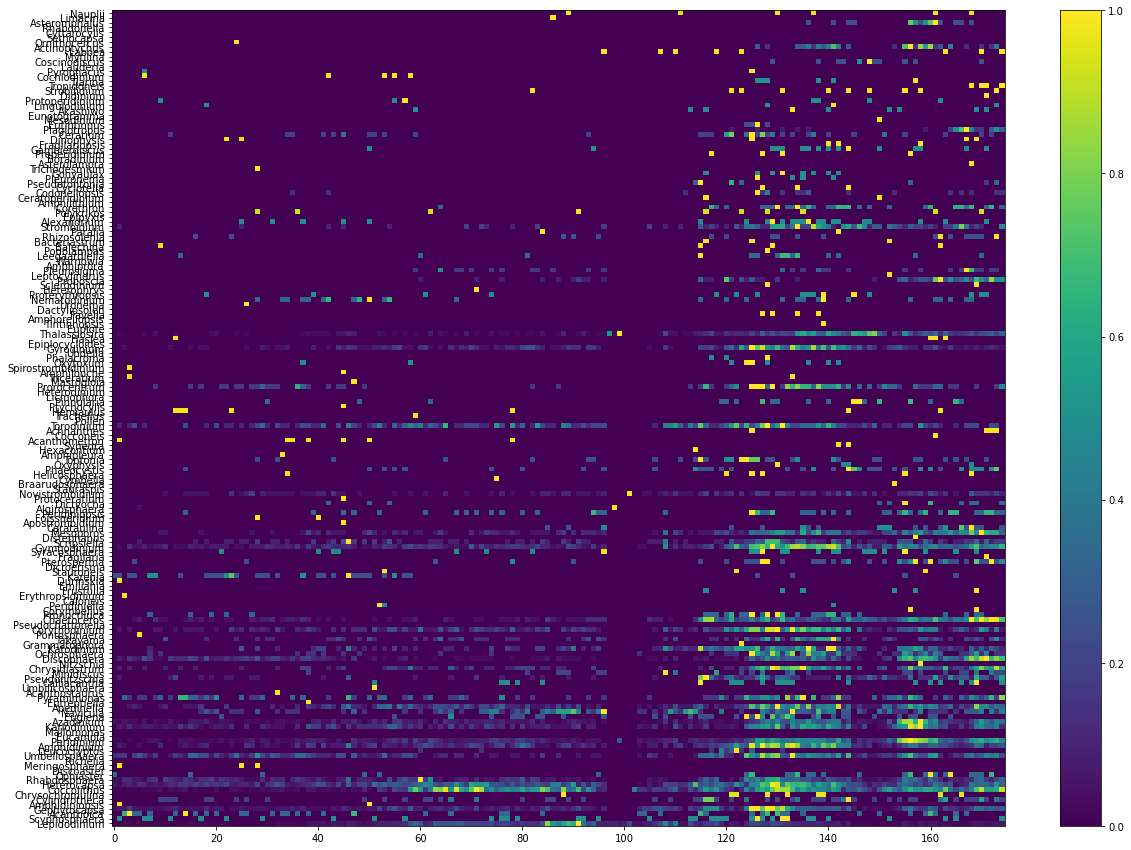

In [109]:
# PLOT - sorted by size, individually normalized from 0 to 1

def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# clean data
df_ifcb = DF_IFCB
df_ifcb = df_ifcb[:].apply(pd.to_numeric, errors='coerce') 
df_ifcb = df_ifcb.fillna(0)

# trim data to take only frist 175 vals 
df_ifcb_trim = df_ifcb.head(175)

# order p_cols by abundance 
# p_sum = df_ifcb_trim.drop(['time','lat', 'lon', 'depth', 'Temperature', 'Salinity', 'Sample', 'Total_Cells'], axis=1).sum()
# p_sum = pd.to_numeric(p_sum)
# top_10 = p_sum.nlargest(20).index
# p_cols = top_10

p_cols = get_genus_list_sorted_by_size_class()
fig, ax = plt.subplots()
# build heatmap
hm_df = pd.DataFrame(columns=df_ifcb_trim['time'], index=p_cols)
for i in range(len(p_cols)):
    p = p_cols[i]
    data = list(df_ifcb_trim[p])
    norm_data = normalize_data(data)
    hm_df.loc[p]= norm_data

# convert hm_df vals to floats
hm_df = hm_df[:].apply(pd.to_numeric, errors='coerce') 
hm_df = hm_df.fillna(0)

pcm = ax.pcolormesh(df_ifcb_trim.index, p_cols, hm_df, cmap='viridis', shading='auto')
fig.set_size_inches(20, 15, forward=True)
plt.colorbar(pcm)
plt.show()


num genuses before cleaning: 168
num genuses after cleaning: 53


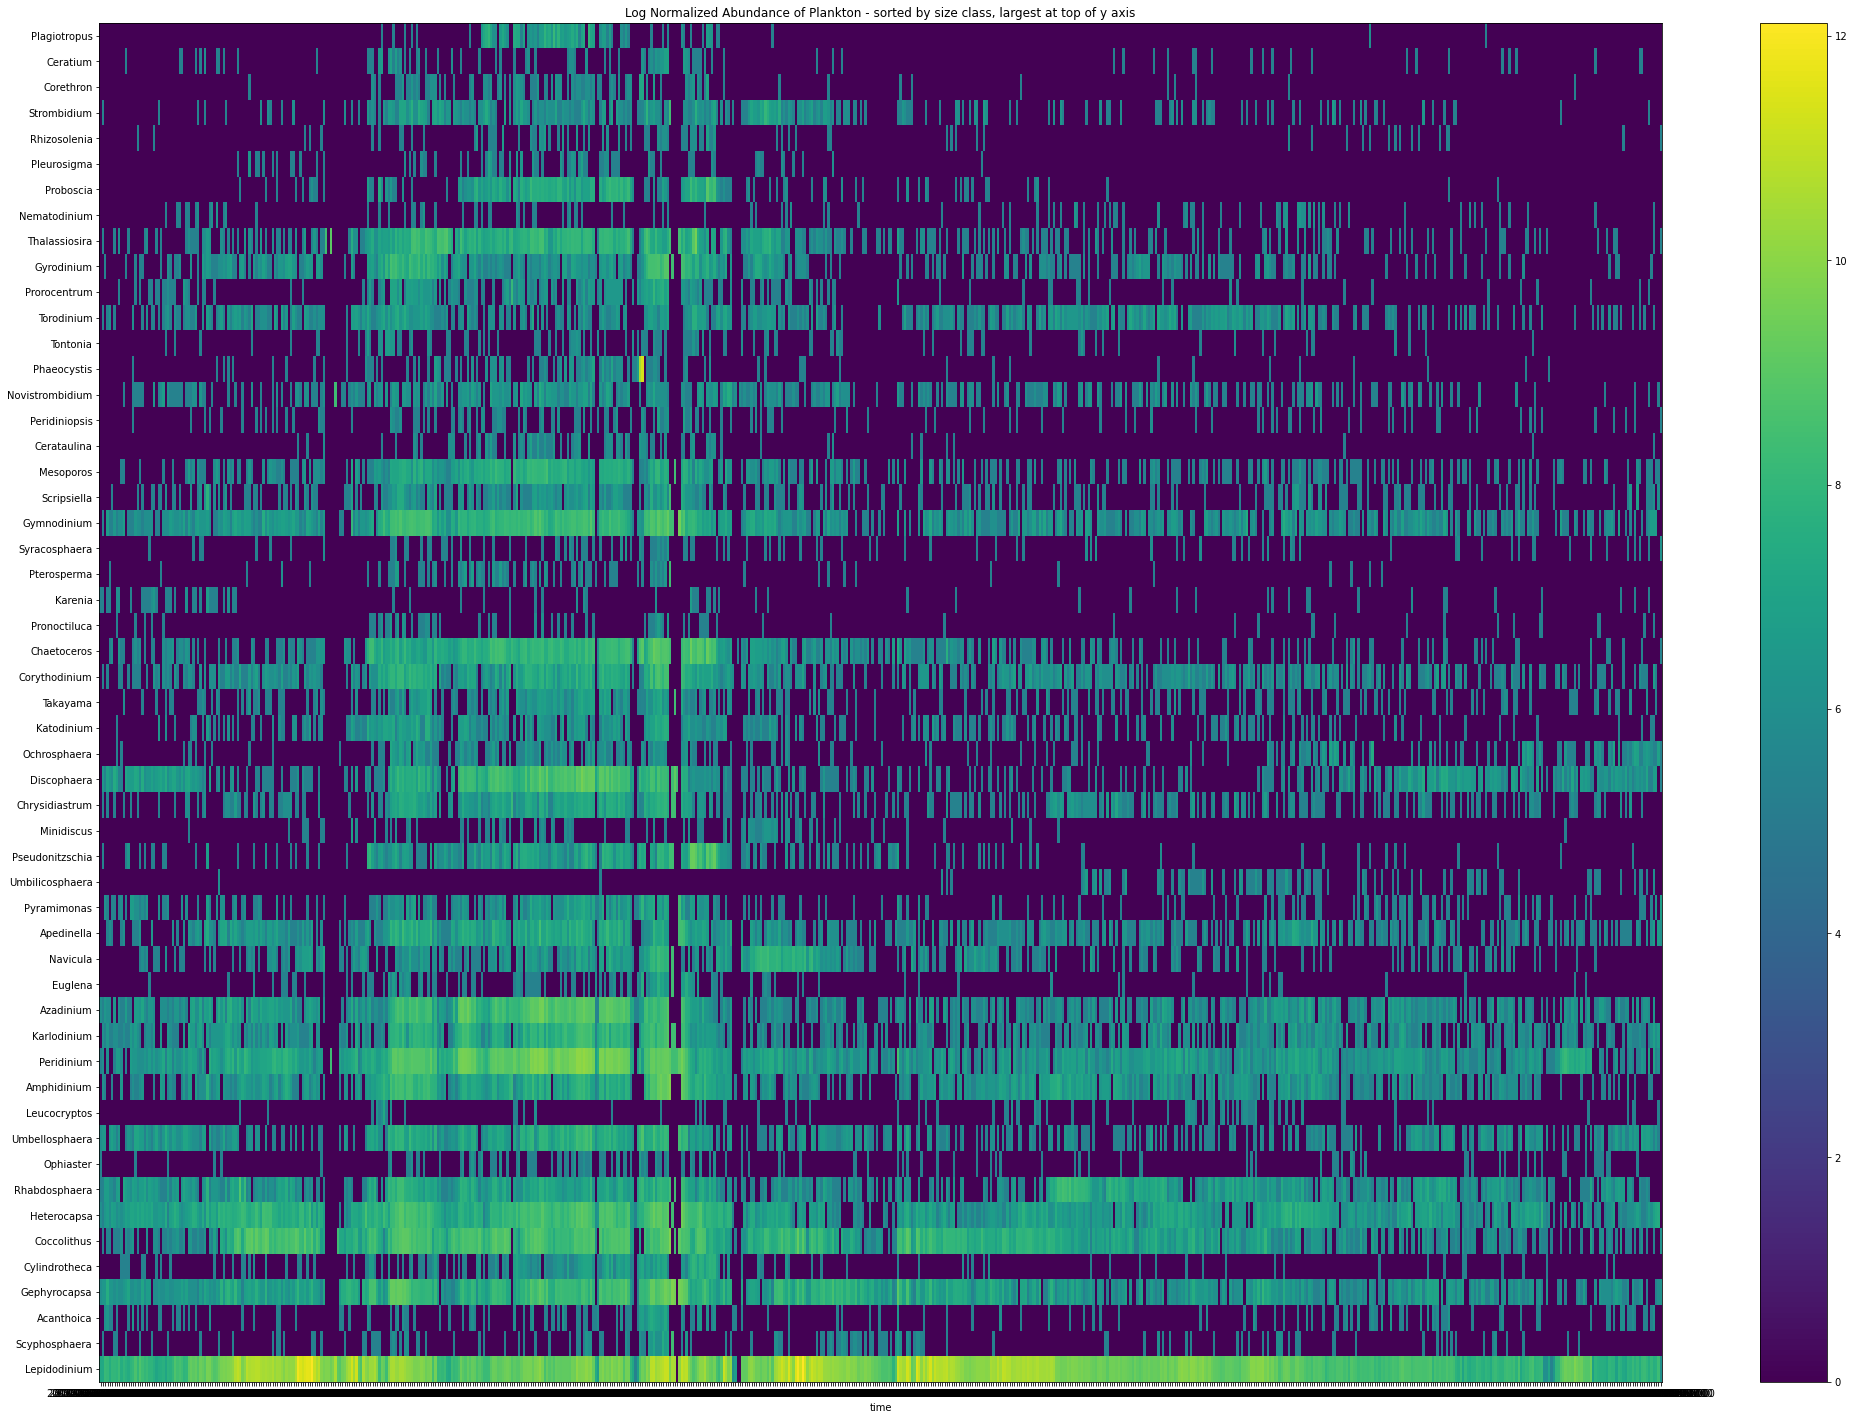

In [19]:
# PLOT - genus sorted by avg size, log normalized, DROP rows that appear in <10% of the samples 

df_ifcb = DF_IFCB
# order p_cols by size class 
p_cols = get_genus_list_sorted_by_size_class()

# build heatmap - rows are plankton genus, columns are time 
hm_df = pd.DataFrame(columns=df_ifcb['time'], index=p_cols)
for i in range(len(p_cols)):
    p = p_cols[i]
    hm_df.loc[p]= list(df_ifcb[p])

# convert hm_df vals to floats
hm_df = hm_df[:].apply(pd.to_numeric, errors='coerce') 
# log val
hm_df[:] = hm_df[:] + 1 
hm_df = hm_df[:].apply(np.log)

#drop genuses that appear in < 10% of the samples 
print("num genuses before cleaning:", len(hm_df.index))
sample_perc = 0.1
max_num_nans = len(hm_df.columns) - len(hm_df.columns)*sample_perc
hm_df_dense = hm_df.loc[(hm_df.isnull().sum(axis=1) <= max_num_nans), :]
print("num genuses after cleaning:", len(hm_df_dense.index))
hm_df_dense = hm_df_dense.fillna(0)

fig, ax = plt.subplots()
pcm = ax.pcolormesh(hm_df_dense.columns, hm_df_dense.index, hm_df_dense, cmap='viridis', shading='auto')
plt.colorbar(pcm)
plt.xlabel("time")
plt.title("Log Normalized Abundance of Plankton - sorted by size class, largest at top of y axis")
fig.set_size_inches(35, 25)
#plt.savefig("p_genus_abundance_dense_10")
plt.show()


In [168]:
# Plot with LAT as x-axis 


<AxesSubplot:>

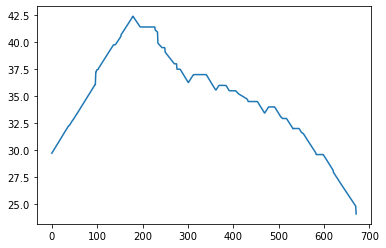

In [28]:
df_ifcb.lat.plot()

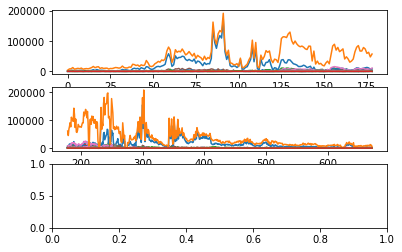

In [98]:
turn_around_idx = df_ifcb.lat.idxmax()
out_df = df_ifcb[:turn_around_idx]
back_df = df_ifcb[turn_around_idx:]

fg, axes = plt.subplots(3)
ax0 = axes[0]
out_df.plot(ax=ax0, legend=False)
back_df.plot(ax=axes[1], legend=False)
plt.show()

num genuses before cleaning: 168
num genuses after cleaning: 53


/var/folders/3d/888v68391rv_kgq9_5s8b2x80000gn/T/ipykernel_16366/811172603.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm0 = ax0.pcolormesh(out_hm.columns, out_hm.index, out_hm, cmap='viridis', shading='auto')
/var/folders/3d/888v68391rv_kgq9_5s8b2x80000gn/T/ipykernel_16366/811172603.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm1 = ax1.pcolormesh(back_hm.columns, back_hm.index, back_hm, cmap='viridis', shading='auto')


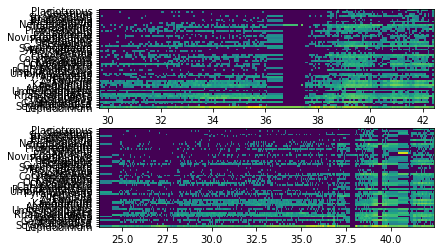

In [32]:
# Plot with LAT as x-axis 
turn_around_idx = df_ifcb.lat.idxmax()
lat_hm = make_hm('lat')

# first: split transect at its turn-around point, plot both by LAT 
fg, axes = plt.subplots(2)
ax0 = axes[0]
out_hm = lat_hm.iloc[:, :turn_around_idx]
pcm0 = ax0.pcolormesh(out_hm.columns, out_hm.index, out_hm, cmap='viridis', shading='auto')
ax1 = axes[1]
back_hm = lat_hm.iloc[:, turn_around_idx:]
pcm1 = ax1.pcolormesh(back_hm.columns, back_hm.index, back_hm, cmap='viridis', shading='auto')
plt.show()

# combine out and back heatmap 
# make a histogram for each genus (bins=delta lat, x=(stacked?)abundance

In [82]:
# combine out and back heatmap 
# make a histogram for each genus (bins=delta lat, x=(stacked?)abundance
import xarray as xr

out_max_lat = out_hm.columns.max()
out_min_lat = out_hm.columns.min()
back_max_lat = back_hm.columns.max()
back_min_lat = back_hm.columns.min()

print("overlapping area", max(out_min_lat, back_min_lat), min(out_max_lat, back_max_lat))

# split x-axis (latitude, columns) into N buckets 
# for each genus:
#   for each bucket:
#   - num_out = number of samples that occurred within this bucket from out_hm
#   - num_back = number of samples that occurred within this bucket from back_hm 
#   - abund_out = sum of all abundances within that bucket from out_hm
#   - abund_back = sum " " back_hm
#   - avg_abund = (abund_out + abund_back) / (num_out + num_back)
#   new_df[genus] = 



overlapping area 29.7066 42.38415


array([[<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'Acanthoica'}>]], dtype=object)

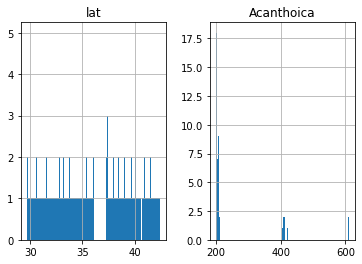

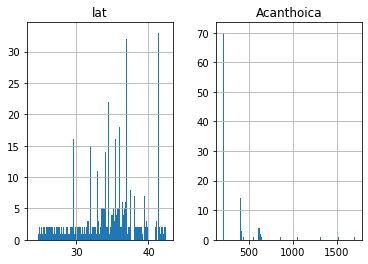

In [95]:
aca = 'Acanthoica'
small_df = out_df[['lat', 'Acanthoica']]
small_df.hist(bins=170)
small_df2 = back_df[['lat', 'Acanthoica']]
small_df2.hist(bins=170)

/var/folders/3d/888v68391rv_kgq9_5s8b2x80000gn/T/ipykernel_16366/138691439.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm0 = ax.pcolormesh(out_hm.columns, out_hm.index, out_hm, cmap=my_cmap)
/var/folders/3d/888v68391rv_kgq9_5s8b2x80000gn/T/ipykernel_16366/138691439.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm1 = ax.pcolormesh(back_hm.columns, back_hm.index, back_hm, cmap=my_cmap)


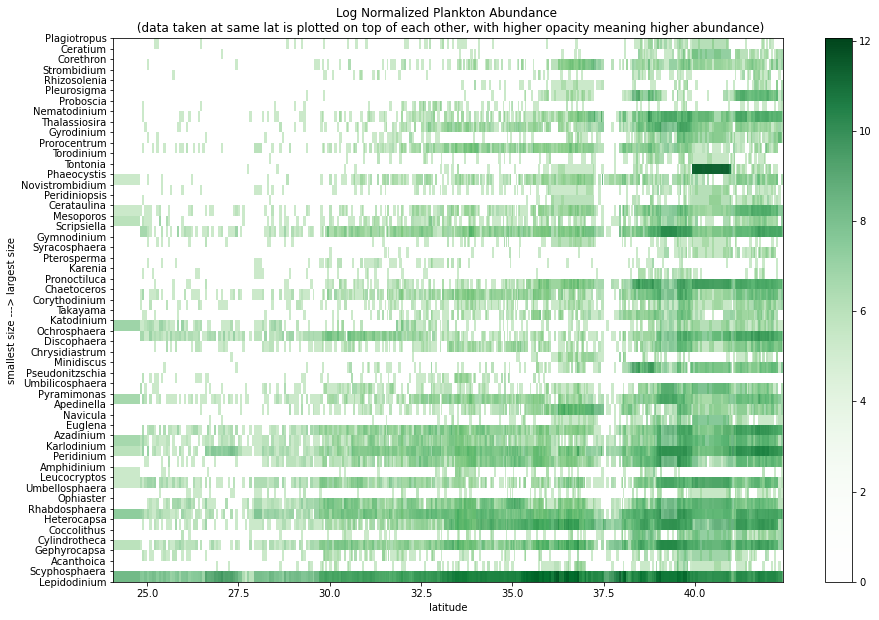

In [166]:
# gonna plot them over each other and try with half alpha

# custom colormap 
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

cmap = pl.cm.Greens
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
# Create new colormap
my_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots()
out_hm = lat_hm.iloc[:, :turn_around_idx]
pcm0 = ax.pcolormesh(out_hm.columns, out_hm.index, out_hm, cmap=my_cmap)
back_hm = lat_hm.iloc[:, turn_around_idx:]
pcm1 = ax.pcolormesh(back_hm.columns, back_hm.index, back_hm, cmap=my_cmap)
ax.set_xlabel("latitude")
ax.set_ylabel("smallest size ---> largest size")
fig.colorbar(pcm0)
fig.set_size_inches(15, 10)
ax.set_title('Log Normalized Plankton Abundance \n (data taken at same lat is plotted on top of each other, with higher opacity meaning higher abundance)')
plt.savefig("p_genus_abundance_lat_opacity")
plt.show()

In [29]:
## TOOLS 

# returns a hm
# y-axis: genus, sorted by avg size, largest at top
# x-axis: default time, can use other column of df_ifcb (i.e. 'lat')
# color: abundance, log-normalized 
# if a genus shows up in < 10% of samples, it is dropped 
def make_hm(x='time'):
    df_ifcb = DF_IFCB
    # order p_cols by size class 
    p_cols = get_genus_list_sorted_by_size_class()

    # build heatmap - rows are plankton genus, columns are time 
    hm_df = pd.DataFrame(columns=df_ifcb[x], index=p_cols)
    for i in range(len(p_cols)):
        p = p_cols[i]
        hm_df.loc[p]= list(df_ifcb[p])

    # convert hm_df vals to floats
    hm_df = hm_df[:].apply(pd.to_numeric, errors='coerce') 
    # log val
    hm_df[:] = hm_df[:] + 1 
    hm_df = hm_df[:].apply(np.log)

    #drop genuses that appear in < 10% of the samples 
    print("num genuses before cleaning:", len(hm_df.index))
    sample_perc = 0.1
    max_num_nans = len(hm_df.columns) - len(hm_df.columns)*sample_perc
    hm_df_dense = hm_df.loc[(hm_df.isnull().sum(axis=1) <= max_num_nans), :]
    print("num genuses after cleaning:", len(hm_df_dense.index))
    hm_df_dense = hm_df_dense.fillna(0)
    return hm_df_dense